In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Garbage classification.zip to Garbage classification.zip


In [ ]:
!unzip /content/Garbage\ classification.zip

Archive:  /content/Garbage classification.zip
   creating: Garbage classification/cardboard/
  inflating: Garbage classification/cardboard/cardboard1.jpg  
  inflating: Garbage classification/cardboard/cardboard10.jpg  
  inflating: Garbage classification/cardboard/cardboard100.jpg  
  inflating: Garbage classification/cardboard/cardboard101.jpg  
  inflating: Garbage classification/cardboard/cardboard102.jpg  
  inflating: Garbage classification/cardboard/cardboard103.jpg  
  inflating: Garbage classification/cardboard/cardboard104.jpg  
  inflating: Garbage classification/cardboard/cardboard105.jpg  
  inflating: Garbage classification/cardboard/cardboard106.jpg  
  inflating: Garbage classification/cardboard/cardboard107.jpg  
  inflating: Garbage classification/cardboard/cardboard108.jpg  
  inflating: Garbage classification/cardboard/cardboard109.jpg  
  inflating: Garbage classification/cardboard/cardboard11.jpg  
  inflating: Garbage classification/cardboard/cardboard110.jpg  
 

Gerekli Kütüphaneler

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shutil
import cv2
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
base_dir = '/content/Garbage classification'

In [ ]:
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
class_counts = {}

# *Hızlı Veri Analizi*


CARDBOARD sınıfından örnekler:


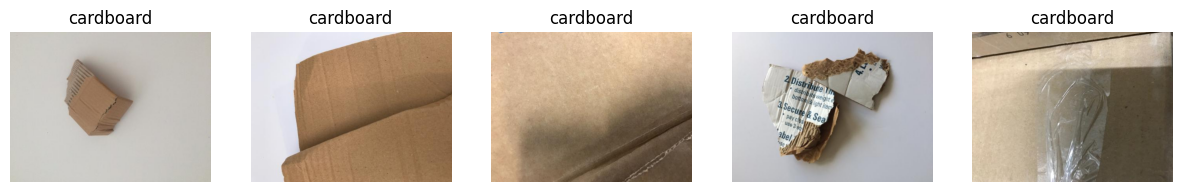


GLASS sınıfından örnekler:


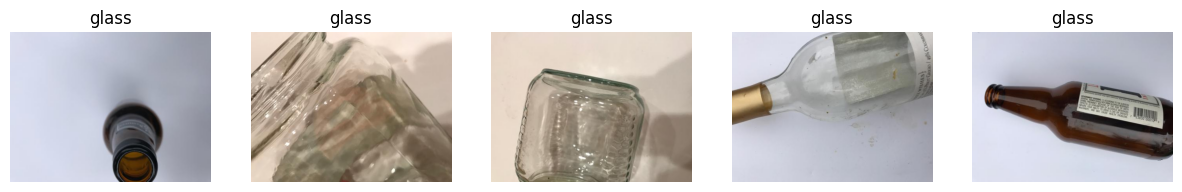


METAL sınıfından örnekler:


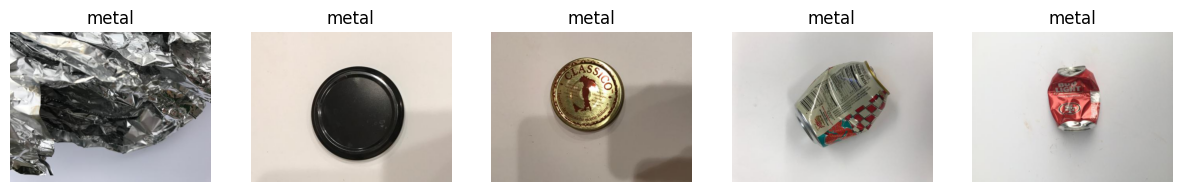


PAPER sınıfından örnekler:


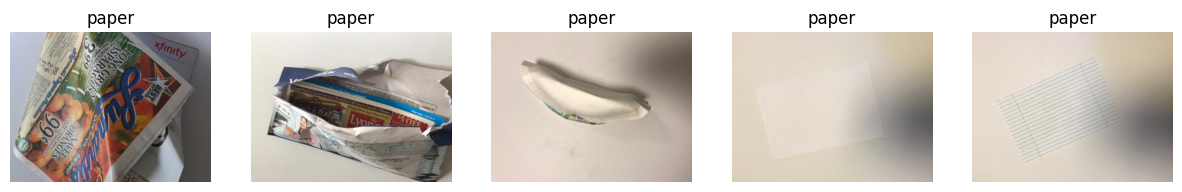


PLASTIC sınıfından örnekler:


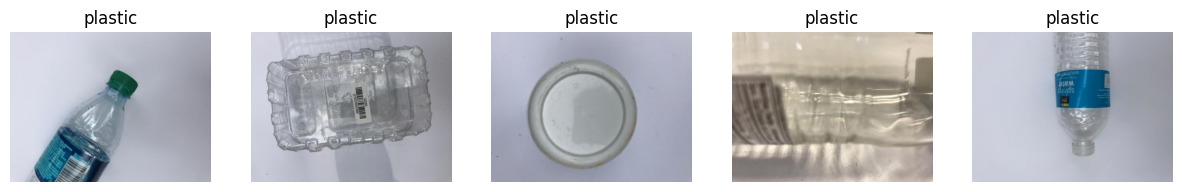


TRASH sınıfından örnekler:


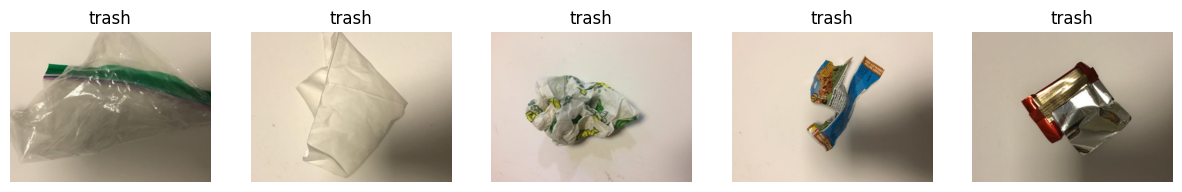

In [ ]:
for cls in classes:
    class_dir = os.path.join(base_dir, cls)
    images = os.listdir(class_dir)

    random_images = random.sample(images, 5)
    print(f"\n{cls.upper()} sınıfından örnekler:")

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for i, image in enumerate(random_images):
        img_path = os.path.join(class_dir, image)
        img = cv2.imread(img_path)
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
        axes[i].set_title(cls)

    plt.show()

    class_counts[cls] = len(images)

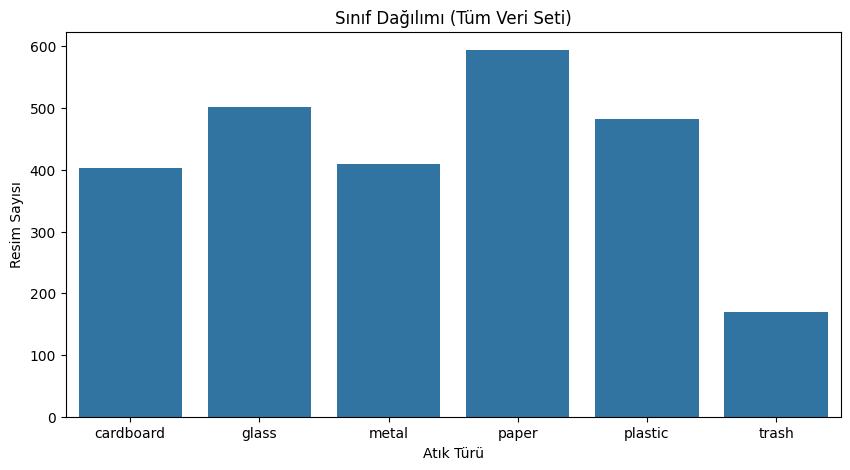

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Sınıf Dağılımı (Tüm Veri Seti)')
plt.xlabel('Atık Türü')
plt.ylabel('Resim Sayısı')
plt.show()

# *Veri Setini Bölme*

In [ ]:
for cls in classes:

    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(base_dir, split, cls)
        os.makedirs(split_dir, exist_ok=True)

    class_dir = os.path.join(base_dir, cls)
    images = os.listdir(class_dir)


    train_images, val_test_images = train_test_split(images, test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(val_test_images, test_size=0.5, random_state=42)

    for image in train_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(base_dir, 'train', cls, image)
        shutil.copy(src, dst)

    for image in val_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(base_dir, 'val', cls, image)
        shutil.copy(src, dst)

    for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(base_dir, 'test', cls, image)
        shutil.copy(src, dst)


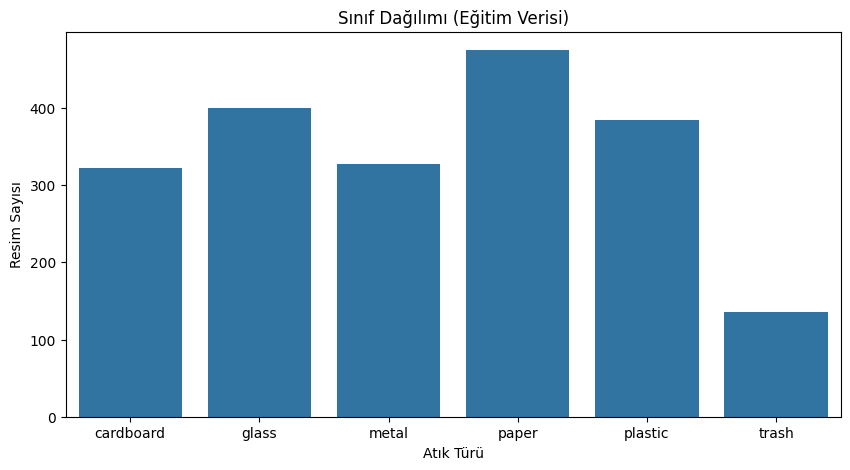

   Atık Türü  Resim Sayısı
0  cardboard           322
1      glass           400
2      metal           328
3      paper           475
4    plastic           385
5      trash           136


In [ ]:
train_class_counts = {}
for cls in classes:
    train_class_dir = os.path.join(base_dir, 'train', cls)
    train_images = os.listdir(train_class_dir)
    train_class_counts[cls] = len(train_images)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()))
plt.title('Sınıf Dağılımı (Eğitim Verisi)')
plt.xlabel('Atık Türü')
plt.ylabel('Resim Sayısı')
plt.show()


train_class_df = pd.DataFrame(list(train_class_counts.items()), columns=['Atık Türü', 'Resim Sayısı'])
print(train_class_df)

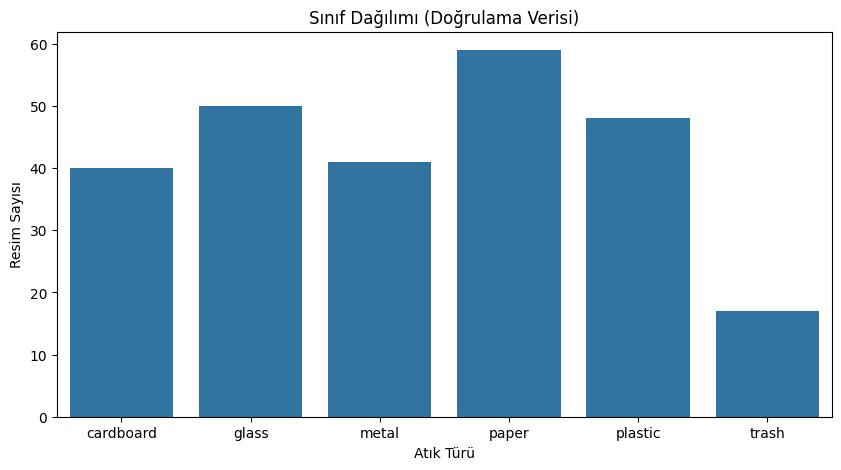


Doğrulama Veri Seti Sınıf Dağılımı:
    Atık Türü  Resim Sayısı
0  cardboard            40
1      glass            50
2      metal            41
3      paper            59
4    plastic            48
5      trash            17


In [ ]:
val_class_counts = {}
for cls in classes:
    val_class_dir = os.path.join(base_dir, 'val', cls)
    images = os.listdir(val_class_dir)
    val_class_counts[cls] = len(images)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(val_class_counts.keys()), y=list(val_class_counts.values()))
plt.title('Sınıf Dağılımı (Doğrulama Verisi)')
plt.xlabel('Atık Türü')
plt.ylabel('Resim Sayısı')
plt.show()

val_class_df = pd.DataFrame(list(val_class_counts.items()), columns=['Atık Türü', 'Resim Sayısı'])
print("\nDoğrulama Veri Seti Sınıf Dağılımı:\n", val_class_df)

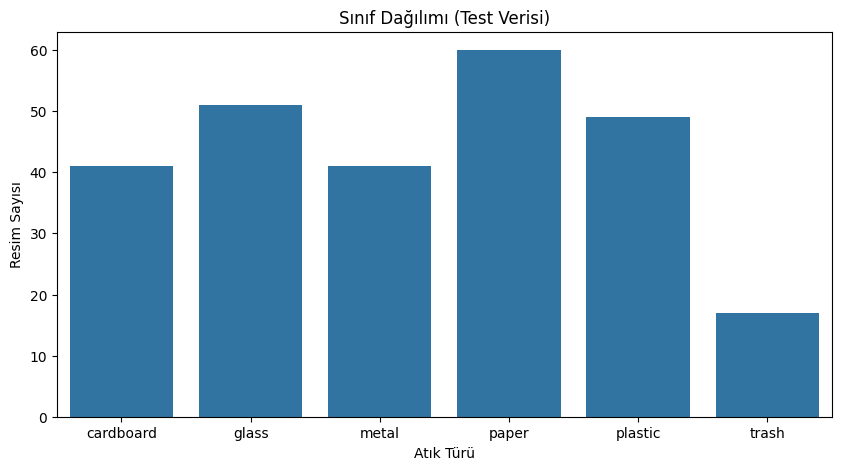


Test Veri Seti Sınıf Dağılımı:
    Atık Türü  Resim Sayısı
0  cardboard            41
1      glass            51
2      metal            41
3      paper            60
4    plastic            49
5      trash            17


In [ ]:
test_class_counts = {}
for cls in classes:
    test_class_dir = os.path.join(base_dir, 'test', cls)
    images = os.listdir(test_class_dir)
    test_class_counts[cls] = len(images)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(test_class_counts.keys()), y=list(test_class_counts.values()))
plt.title('Sınıf Dağılımı (Test Verisi)')
plt.xlabel('Atık Türü')
plt.ylabel('Resim Sayısı')
plt.show()


test_class_df = pd.DataFrame(list(test_class_counts.items()), columns=['Atık Türü', 'Resim Sayısı'])
print("\nTest Veri Seti Sınıf Dağılımı:\n", test_class_df)

In [ ]:
train_dir = '/content/Garbage classification/train'
val_dir = '/content/Garbage classification/val'
test_dir = '/content/Garbage classification/test'
img_width, img_height = 224, 224

In [ ]:
base_dir = '/content/Garbage classification'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

*Veri jeneratörleri (data generators)*




In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_test_datagen = ImageDataGenerator(rescale=1./255)

"trash" sınıfı için veri artırma

In [ ]:
trash_class_dir = os.path.join(train_dir, 'trash')
augmented_trash_dir = os.path.join(train_dir, 'augmented_trash')

if not os.path.exists(augmented_trash_dir):
    os.makedirs(augmented_trash_dir)

In [ ]:
trash_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
trash_generator = trash_datagen.flow_from_directory(
    directory=train_dir,
    classes=['trash'],
    target_size=(img_width, img_height),
    batch_size=1,
    save_to_dir=augmented_trash_dir,
    save_prefix='augmented',
    save_format='jpeg')


Found 136 images belonging to 1 classes.


In [ ]:
num_augmented_images = 200  # Augment edeceğimiz trash görüntü sayısı
for i in range(num_augmented_images):
    next(trash_generator)

In [ ]:
# Yeniden veri artırma işlemi yapıldıktan sonra "trash" ve "augmented_trash" klasörlerini birleştirin
import shutil
for filename in os.listdir(augmented_trash_dir):
    shutil.move(os.path.join(augmented_trash_dir, filename), trash_class_dir)


In [ ]:
# augmented_trash klasörünü sil
os.rmdir(augmented_trash_dir)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

Found 2246 images belonging to 6 classes.
Found 255 images belonging to 6 classes.
Found 259 images belonging to 6 classes.


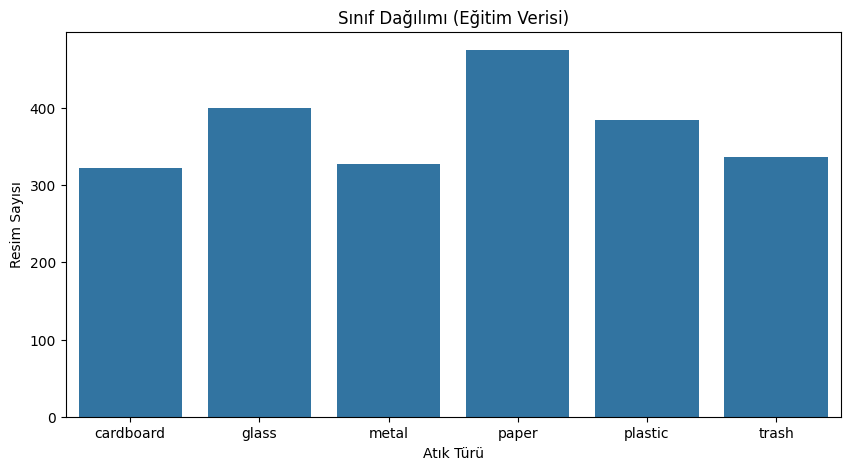

   Atık Türü  Resim Sayısı
0  cardboard           322
1      glass           400
2      metal           328
3      paper           475
4    plastic           385
5      trash           336


In [ ]:
train_class_counts = {}
for cls in classes:
    train_class_dir = os.path.join(base_dir, 'train', cls)
    train_images = os.listdir(train_class_dir)
    train_class_counts[cls] = len(train_images)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()))
plt.title('Sınıf Dağılımı (Eğitim Verisi)')
plt.xlabel('Atık Türü')
plt.ylabel('Resim Sayısı')
plt.show()


train_class_df = pd.DataFrame(list(train_class_counts.items()), columns=['Atık Türü', 'Resim Sayısı'])
print(train_class_df)

CNN

In [ ]:
num_classes = len(train_generator.class_indices)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
epochs = 100
batch_size = 32

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
70/70 [==============================] - 25s 359ms/step - loss: 0.3356 - accuracy: 0.8767 - val_loss: 0.8395 - val_accuracy: 0.7500
Epoch 2/100
70/70 [==============================] - 25s 354ms/step - loss: 0.3796 - accuracy: 0.8659 - val_loss: 0.7021 - val_accuracy: 0.7991
Epoch 3/100
70/70 [==============================] - 25s 357ms/step - loss: 0.3696 - accuracy: 0.8731 - val_loss: 0.6250 - val_accuracy: 0.8393
Epoch 4/100
70/70 [==============================] - 25s 357ms/step - loss: 0.3345 - accuracy: 0.8808 - val_loss: 0.6190 - val_accuracy: 0.8036
Epoch 5/100
70/70 [==============================] - 25s 359ms/step - loss: 0.3607 - accuracy: 0.8726 - val_loss: 0.8917 - val_accuracy: 0.7857
Epoch 6/100
70/70 [==============================] - 25s 354ms/step - loss: 0.3517 - accuracy: 0.8803 - val_loss: 0.7766 - val_accuracy: 0.7545
Epoch 7/100
70/70 [==============================] - 25s 354ms/step - loss: 0.3271 - accuracy: 0.8749 - val_loss: 1.0078 - val_accuracy:

In [ ]:
train_loss, train_accuracy = loaded_model.evaluate(train_generator, verbose=1)

print(f"Eğitim Doğruluğu: {train_accuracy * 100:.2f}%")

71/71 [==============================] - 25s 347ms/step - loss: 0.4381 - accuracy: 0.8776
Eğitim Doğruluğu: 87.76%


In [ ]:
val_loss, val_accuracy = loaded_model.evaluate(val_generator, verbose=1)

print(f"Doğrulama Doğruluğu: {val_accuracy * 100:.2f}%")

8/8 [==============================] - 1s 52ms/step - loss: 0.6690 - accuracy: 0.8667
Doğrulama Doğruluğu: 86.67%


In [ ]:
# Eğitim ve doğrulama kaybı
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_loss) + 1)

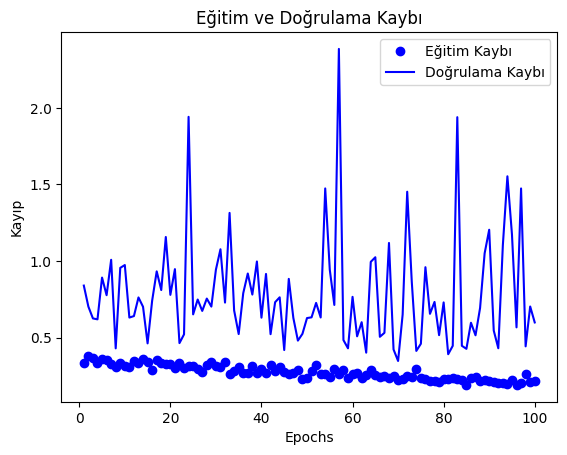

In [ ]:
plt.plot(epochs_range, train_loss, 'bo', label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


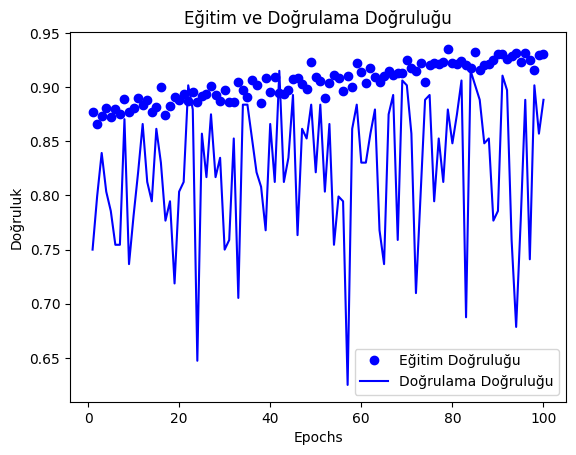

In [ ]:
# Eğitim ve doğrulama doğruluğu
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs_range, train_acc, 'bo', label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, 'b', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

Modeli Kaydetme

In [ ]:
model.save('garbage_classification_CNN101_model.h5')

In [ ]:
model_path = 'garbage_classification_CNN101_model.h5'

if os.path.exists(model_path):
    print("Model başarıyla kaydedildi.")
else:
    print("Model kaydedilemedi.")

Model başarıyla kaydedildi.


Kaydedilen Modeli Yükleme:

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('garbage_classification_CNN101_model.h5')

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        